In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *
import math

In [46]:
def calcVfinal(mFuel):
    sat_5 = System(v0=0, vExhaust=2550, mVehicle=10, mDot=1169.36)
    V = sat_5.v0
    vE = sat_5.vExhaust
    mV = sat_5.mVehicle
    dm = sat_5.mDot
    m0 = mFuel
    
    # Time to use up all the fuel
    t = mFuel/dm
    V_time =  V + vE * math.log((mV + mFuel)/(mV)) - 9.8 * t
    
    sat_5 = System(v0=0, vExhaust=2550, mVehicle=10, mDot=1169.36)
    while ((mFuel - dm) > 0):
        # LOG THIS INTO A TIMESERIES
        print("V = " + str(V))
        V = V + vE * math.log((mV + mFuel)/(mV + mFuel - dm)) - 9.8
        mFuel -= dm
      
    print(V_time)
    print(V)
    
    # return V
    
    
    

In [48]:
calcVfinal(10000)  #1658

V = 0.0
V = 306.974568826
V = 658.957825166
V = 1070.89204234
V = 1566.67058419
V = 2188.11648918
V = 3019.12075988
V = 4272.23842492
17533.5181606
6874.22969074


In [32]:
def simulate_saturn_v():
    
    # Stage 1
    m0 = 2900000
    mf = 731000
    mFuel = m0-mf
    vE = 263*9.8
    dm = 12890
    
    t = mFuel/dm
    dV1 =  vE * math.log(m0/mf) - 9.8 * t
    
    # Stage 2
    m0 = 600000
    mf = 156000
    mFuel = m0-mf
    vE = 421*9.8
    dm = mFuel/475
    
    t = mFuel/dm
    dV2 =  vE * math.log(m0/mf) - 9.8 * t
    
    # Stage 3
    m0 = 120800
    mf = 10000
    mFuel = m0-mf
    vE = 421*9.8
    dm = mFuel/475
    
    t = mFuel/dm
    dV3 =  vE * math.log(m0/mf) - 9.8 * t
    
    print(dV1)
    print(dV2)
    print(dV3)
    print(dV1+dV2+dV3)
    
simulate_saturn_v()

1902.7468864975515
902.7564567806376
5624.641910044014
8430.145253322204


In [30]:
def simulate_apollo_cmd_module():
    
    m0 = 14690
    mf = 11900   # Actual empty value is 11900, but I estimate ~1/2 of that fuel was actually burned for this maneuver
    vE = 319*9.8
    
    dV =  vE * math.log(m0/mf)
    print(dV)
    
simulate_apollo_cmd_module()

658.4670982715267


In [ ]:
# THIS IS A SANDBOX, IGNORE ITS IMPORTANCE

rocket = (system)

def calcVfinal(mFuel):
    
    V = 0
    vE = 1200*9.8
    mV = sat_5.mVehicle
    dm = sat_5.mDot
    m0 = mFuel
    
    # Time to use up all the fuel
    t = mFuel/dm
    V_time =  V + vE * math.log((mV + mFuel)/(mV)) - 9.8 * t
    
    
    while ((mFuel - dm) > 0):
        #print(vE * math.log((mV + mFuel)/(mV + mFuel - dm)))
        V = V + vE * math.log((mV + mFuel)/(mV + mFuel - dm)) - 9.8
        mFuel -= dm
      
    print(V_time)
    print(V)
    
    # return V

These are the actual functional components of the model, below:

In [2]:
rocketState = State(mFuel=10000, vCurrent=0)
rocket = System(init=rocketState, vExhaust=2550, mDry=10, dm=1169.36)

In [3]:
def update(state, r):
    
    v0 = state.vCurrent
    vf = v0 + r.vExhaust * math.log((r.mDry + state.mFuel)/(r.mDry + state.mFuel - r.dm)) - 9.8
    
    return State(mFuel=state.mFuel-r.dm, vCurrent=vf)

In [4]:
def run_simulation(r, update_func):
    
    frame = TimeFrame(columns=r.init.index)
    t0 = 0
    frame.loc[t0] = r.init
    
    # This technically makes the model a little less
    # accurate but it prevents math errors later
    r.init.mFuel = r.init.mFuel - (r.init.mFuel % r.dm)
    tBurn = math.ceil(r.init.mFuel / rocket.dm)
    
    dt = 1   # DO NOT CHANGE THIS, MASS FLOW RATE IS IN KG/SECOND
    ts = linrange(t0, tBurn-dt, dt)
    #print(ts)
    
    for t in ts:
        #print(update_func(frame.loc[t], r))
        frame.loc[t+dt] = update_func(frame.loc[t], r)
        
    r.results = frame
    

In [5]:
rocketState = State(mFuel=10000, vCurrent=0)
rocket = System(init=rocketState, vExhaust=2550, mDry=10, dm=1169.36)
run_simulation(rocket, update)
rocket.results

,mFuel,vCurrent
0,10000.00,0.000000
1,8830.64,306.974569
2,7661.28,658.957825
3,6491.92,1070.892042
4,5322.56,1566.670584
5,4153.20,2188.116489
6,2983.84,3019.120760
7,1814.48,4272.238425
8,645.12,6874.229691


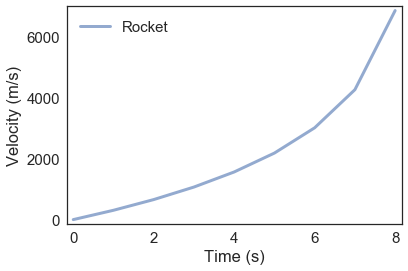

In [9]:
plot(rocket.results.vCurrent, label='Rocket')
decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

<b>Parameters for geostationary orbit</b> <br>
Orbit Height: 35,786,000 m (35,786 km) <br>
Velocity: 3,070 m/s (3.07 km/s)

In [16]:
#def run_sweep(rocketState, r, m_low, m_high):    
#    sweep = 
    
def final_v(rocket):
    if hasattr(rocket, 'results'):
        return rocket.results.vCurrent[len(rocket.results.vCurrent)-1]
    else:
        return rocket.init.vCurrent

    
def error_func(mFuel):
    r = rocket
    r.init.mFuel = mFuel #sets the state to given fuel value
    run_simulation(r, update)
    #print("-----------------")  # Comment this out
    #print("Testing fuel mass: " + str(mFuel))
    #print("vFinal: " + str(final_v(r)))     # Comment this out
    return final_v(r) - 3070
    

In [32]:
rocketState = State(mFuel=0, vCurrent=0)#why is mFuel 0?
rocket = System(init=rocketState, vExhaust=2550, mDry=10, dm=1169.36)

solution = fsolve(error_func, 2000, xtol=1e-4)
print("mFuel: " + str(solution[0]))

mFuel: 1658.35910954


In [24]:
# This is just copied from notebook 7, it doesn't function yet

sweep = SweepSeries()
for mD in linrange(0, 30, 2): #sweeping dry masses
    rocketState = State(mFuel=0, vCurrent=0) 
    rocket = System(init=rStateCurr, vExhaust=2550, mDry=mD, dm=1169.36)
    solution = fsolve(error_func, 2000, xtol=1e-4)
    
    sweep[mD] = solution[0]

In [25]:
print(sweep)

0     3330.467509
2     1666.331629
4     1664.432502
6     1662.909119
8     1660.109197
10    1658.359110
12    1656.138783
14    3316.377586
16    3314.372948
18    4677.320208
20    1648.278218
22    1646.708207
24    1644.502178
26    1642.749858
28    1640.864925
30    3300.394572
dtype: float64


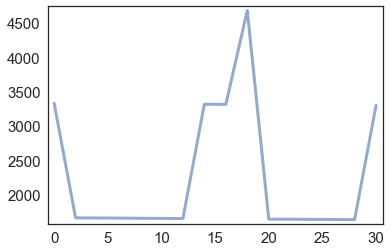

In [26]:
plot(sweep)